In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv('MRec.csv')
data=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Mood,Genre
0,55,F,Happy,Rock
1,55,F,Gloomy,Blues
2,55,F,Stressed,Rock
3,55,F,Relaxing,Instrumental
4,55,F,Energetic,Hiphop


In [2]:
df.tail()

,Age,Gender,Mood,Genre
725,17,F,Happy,Pop
726,17,F,Gloomy,Pop
727,17,F,Stressed,Pop
728,17,F,Relaxing,Pop
729,17,F,Energetic,Pop


In [3]:
#Mean, std, and quartiles of dataset
data.describe()

,Age
count,154.000000
mean,27.064935
std,8.047795
min,17.000000
25%,21.000000
50%,24.000000
75%,32.000000
max,55.000000


In [4]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Age       0
Gender    0
Mood      0
Genre     0
dtype: int64


In [5]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [55 49 47 45 43 42 39 37 36 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20
 19 18 17]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Blues' 'Instrumental' 'Hiphop' 'Pop' 'Indie/Acoustic' 'Country'
 'EDM']


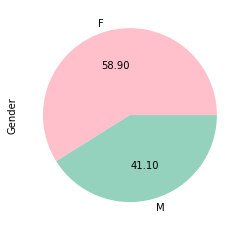

In [6]:
#Distribution of gender by pie-chart
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

In [7]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(730, 4)


In [8]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)

#Replace null values with NaN
df['Age'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Age'])
df['Gender'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Gender'])
df['Mood'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Mood'])

df.head(7)


,Age,Gender,Mood,Genre
0,55,1,Happy,Rock
1,55,1,Gloomy,Blues
2,55,1,Stressed,Rock
3,55,1,Relaxing,Instrumental
4,55,1,Energetic,Hiphop
5,49,0,Happy,Rock
6,49,0,Gloomy,Pop


In [9]:
#One hot encoding for Mood
ohe_Mood = pd.get_dummies(df['Mood'])
Mood = ohe_Mood
Mood.head(10)

,Energetic,Gloomy,Happy,Relaxing,Stressed
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,1,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,0,0,0,1,0
9,1,0,0,0,0


In [10]:
#Replacing NaN instances with mean values
columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)


In [11]:
df.head()

,Age,Gender,Mood,Genre
0,55,1,Happy,Rock
1,55,1,Gloomy,Blues
2,55,1,Stressed,Rock
3,55,1,Relaxing,Instrumental
4,55,1,Energetic,Hiphop


In [12]:
#Checking for null values again
df.isnull().sum()

Age       0
Gender    0
Mood      0
Genre     0
dtype: int64

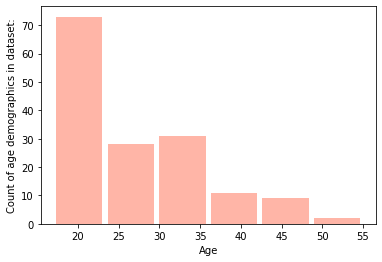

In [13]:
#Histogram of age
plt.hist(data['Age'], bins=6, rwidth=0.9, color="#ffb5a7")
plt.xlabel("Age")
plt.ylabel("Count of age demographics in dataset:")

plt.show()

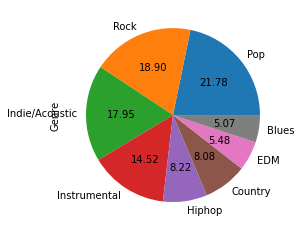

In [14]:
#Distribution of genre by pie-chart
df['Genre'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

(array([23., 11., 14.,  0., 74., 12.,  0.,  7.,  8.,  5.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

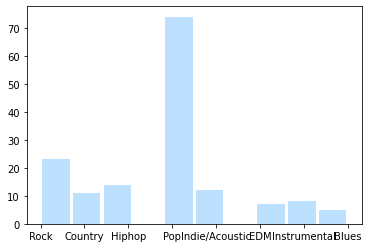

In [15]:
plt.hist(data['Happy'],color = "#bde0fe", rwidth=0.9)

(array([27., 15., 46.,  0., 24., 11.,  0.,  6.,  6., 19.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

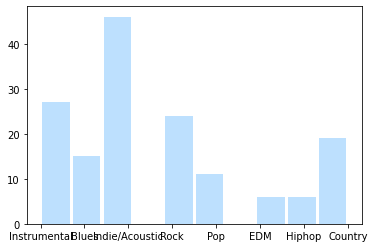

In [16]:
plt.hist(data['Gloomy'],color = "#bde0fe", rwidth=0.9)

(array([20., 45., 20.,  0., 12., 30.,  0.,  9., 10.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

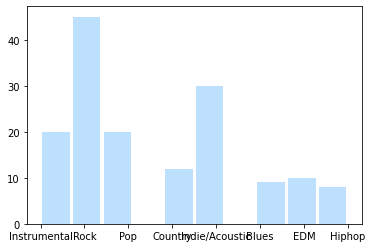

In [17]:
plt.hist(data['Stressed'],color = "#bde0fe", rwidth=0.9)

(array([42.,  9., 21.,  0., 39.,  3.,  0., 32.,  5.,  3.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

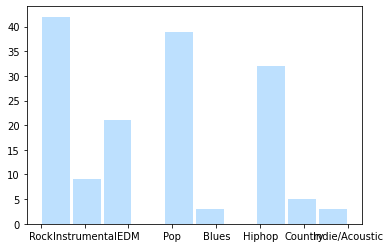

In [18]:
plt.hist(data['Energetic'],color = "#bde0fe", rwidth=0.9)

(array([51.,  4., 45.,  0., 15., 18.,  0.,  8.,  9.,  4.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

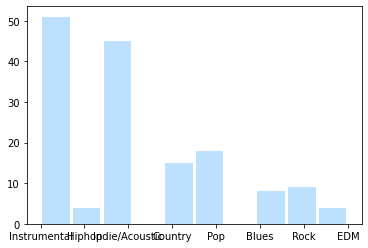

In [19]:
plt.hist(data['Relaxing'],color = "#bde0fe", rwidth=0.9)

<AxesSubplot:xlabel='Age', ylabel='Genre'>

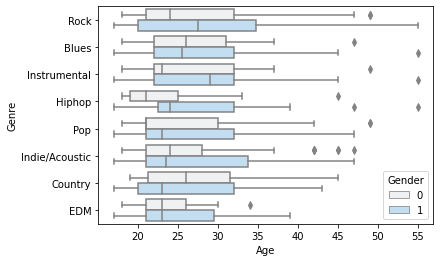

In [20]:
#Boxplot between Age and Genre, coloured by Gender
sns.boxplot(x='Age',y='Genre',hue='Gender',color = '#bbdef9',data=df)

<AxesSubplot:xlabel='Genre', ylabel='Mood'>

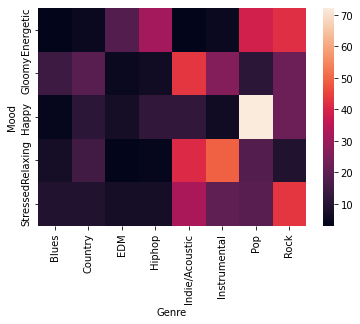

In [21]:
#Correlation between Mood and Genre
sns.heatmap(pd.crosstab(df['Mood'], df['Genre']))

<AxesSubplot:xlabel='Happy', ylabel='Age'>

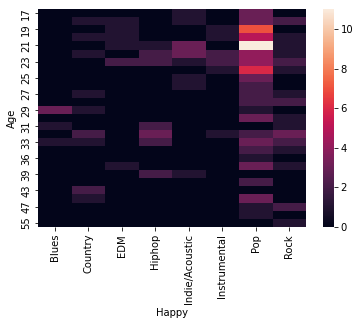

In [22]:
#Correlation between which Genre is preferred by age groups when Happy
sns.heatmap(pd.crosstab(data['Age'], data['Happy']))

<AxesSubplot:xlabel='Gloomy', ylabel='Age'>

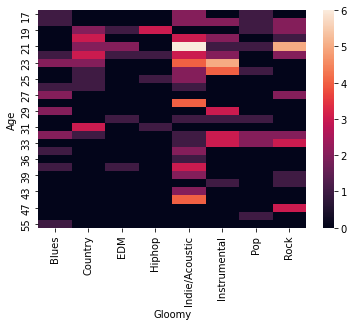

In [23]:
#Correlation between which Genre is preferred by age groups when Gloomy
sns.heatmap(pd.crosstab(data['Age'], data['Gloomy']))

<AxesSubplot:xlabel='Stressed', ylabel='Age'>

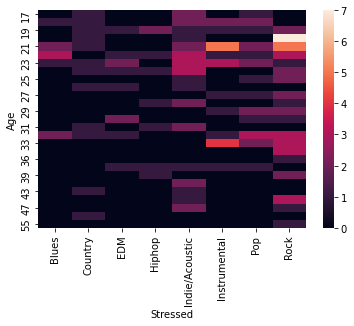

In [24]:
#Correlation between which Genre is preferred by age groups when Stressed
sns.heatmap(pd.crosstab(data['Age'], data['Stressed']))

<AxesSubplot:xlabel='Relaxing', ylabel='Age'>

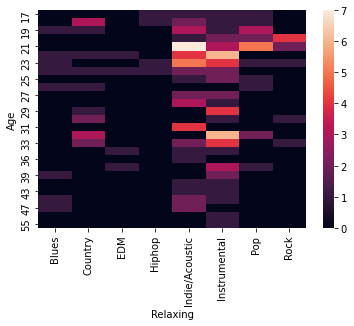

In [25]:
#Correlation between which Genre is preferred by age groups when Relaxing
sns.heatmap(pd.crosstab(data['Age'], data['Relaxing']))

<AxesSubplot:xlabel='Energetic', ylabel='Age'>

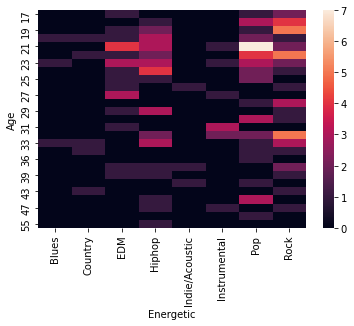

In [26]:
#Correlation between which Genre is preferred by age groups when Energetic
sns.heatmap(pd.crosstab(data['Age'], data['Energetic']))

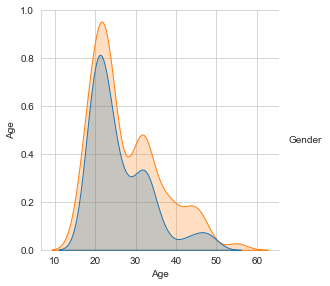

In [27]:
#Pairplot between all numerical categories
sns.set_style("whitegrid");
columns = ['Age','Gender','Mood']
sns.pairplot(df[columns], hue="Gender",height = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

<AxesSubplot:>

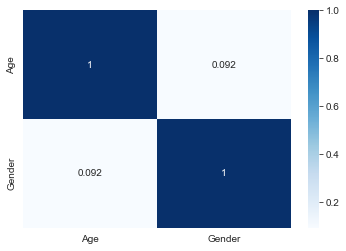

In [28]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [29]:
#Model testing
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)

X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier(criterion="entropy")
model=model.fit(X_train, y_train)

In [30]:
from sklearn import metrics
#Classification accuracy can be misleading 
#if you have an unequal number of observations in each class, or if you have more than two classes in your dataset.
print(metrics.classification_report(y_test, model.predict(X_test)))

print(accuracy_score(y_test, model.predict(X_test)))

print(metrics.confusion_matrix(y_test, model.predict(X_test)))

                precision    recall  f1-score   support

         Blues       0.00      0.00      0.00         9
       Country       0.20      0.18      0.19        17
           EDM       0.00      0.00      0.00        11
        Hiphop       0.16      0.31      0.21        13
Indie/Acoustic       0.24      0.38      0.29        29
  Instrumental       0.39      0.38      0.39        29
           Pop       0.46      0.32      0.38        41
          Rock       0.40      0.24      0.30        34

      accuracy                           0.27       183
     macro avg       0.23      0.22      0.22       183
  weighted avg       0.31      0.27      0.28       183

0.273224043715847
[[ 0  1  0  0  3  4  1  0]
 [ 0  3  1  2  6  1  1  3]
 [ 0  0  0  5  0  1  3  2]
 [ 1  0  1  4  5  1  1  0]
 [ 3  4  0  2 11  4  2  3]
 [ 0  2  0  2  8 11  4  2]
 [ 4  1  7  2  8  4 13  2]
 [ 3  4  1  8  5  2  3  8]]


## data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

from joblib import dump, load
joblib.dump(model,'C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

predictions=model.predict(X_test)

In [31]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler
mdl = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
X= pd.read_csv('MRec.csv')
X_test = [[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
y_pred=mdl.predict(X_test)

val=pd.DataFrame(y_pred, columns=['Genre'])
val

,Genre
0,Pop
1,EDM
2,Hiphop
3,Country
4,Indie/Acoustic


In [32]:
#Load saved model
lr = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

X=[[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
lr.predict(X)

array(['Pop', 'EDM', 'Hiphop', 'Country', 'Indie/Acoustic'], dtype=object)

In [33]:
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )